<a href="https://colab.research.google.com/github/PrakritiSaldiya20/Credit_Card_Fraud_Detection/blob/main/Credit_Crad_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD DETECTION

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [43]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [44]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
259427,159111.0,-1.179649,-0.504119,1.484059,-0.508428,0.549946,-0.945195,0.176153,0.056981,0.503172,...,0.400470,0.819796,0.023627,-0.129637,0.153066,-0.556284,0.107515,0.166935,95.00,0.0
259428,159111.0,1.975655,-1.484272,-1.991903,-1.773126,1.304151,3.717924,-1.376639,0.944947,-0.016821,...,-0.161256,-0.694697,0.388977,0.671973,-0.473031,-0.561277,0.012325,-0.034432,97.09,0.0
259429,159112.0,1.676753,-0.593626,-1.345935,1.037221,-0.299915,-0.644091,0.053228,-0.227412,1.379008,...,0.282568,1.024251,-0.265934,0.002083,0.379770,0.055311,0.017531,-0.000965,162.98,0.0
259430,159112.0,2.064447,-1.102539,-0.419606,-0.455732,-1.161577,-0.075898,-1.163322,0.102897,0.054286,...,-0.143548,0.191926,0.153659,-0.393547,-0.361673,0.734349,-0.016425,-0.058744,24.50,0.0
259431,159112.0,-0.455750,0.790651,-0.057209,-0.828474,0.670568,-0.631063,0.781272,-0.012057,0.127898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259432 entries, 0 to 259431
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    259432 non-null  float64
 1   V1      259432 non-null  float64
 2   V2      259432 non-null  float64
 3   V3      259432 non-null  float64
 4   V4      259432 non-null  float64
 5   V5      259432 non-null  float64
 6   V6      259432 non-null  float64
 7   V7      259432 non-null  float64
 8   V8      259432 non-null  float64
 9   V9      259432 non-null  float64
 10  V10     259432 non-null  float64
 11  V11     259432 non-null  float64
 12  V12     259431 non-null  float64
 13  V13     259431 non-null  float64
 14  V14     259431 non-null  float64
 15  V15     259431 non-null  float64
 16  V16     259431 non-null  float64
 17  V17     259431 non-null  float64
 18  V18     259431 non-null  float64
 19  V19     259431 non-null  float64
 20  V20     259431 non-null  float64
 21  V21     25

In [46]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [47]:
credit_card_data['Class'].value_counts()

,count
Class,
0.0,258960
1.0,471


In [48]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [49]:
print(legit.shape)
print(fraud.shape)

(258960, 31)
(471, 31)


In [50]:
legit.Amount.describe()

,Amount
count,258960.000000
mean,90.092743
std,249.800160
min,0.000000
25%,5.990000
50%,22.900000
75%,79.000000
max,19656.530000


In [51]:
fraud.Amount.describe()

,Amount
count,471.000000
mean,123.004480
std,260.039541
min,0.000000
25%,1.000000
50%,8.900000
75%,105.350000
max,2125.870000


In [52]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,87946.486666,-0.013555,-0.024142,0.084264,0.008398,-0.022057,0.015166,-0.001662,0.000123,0.005252,...,0.002592,-0.002242,-0.007265,-0.004017,0.001215,0.014791,0.001171,-0.000848,0.000456,90.092743
1.0,77012.458599,-4.918337,3.730000,-7.164132,4.619731,-3.302766,-1.392945,-5.734752,0.616343,-2.623609,...,0.374181,0.744490,0.002442,-0.051072,-0.106328,0.043639,0.047205,0.163664,0.073052,123.004480


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [53]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [54]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [55]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2463,2029.0,-0.667367,-0.479007,2.026512,2.240121,-1.785324,1.371491,-1.663363,-2.306503,0.938575,...,-1.155912,0.548137,-0.386310,0.444895,0.750750,-0.058660,0.136507,0.300104,288.45,0.0
21631,31774.0,-0.240469,0.996200,1.272533,0.836965,0.274817,-0.319110,0.680451,0.004417,-0.571346,...,0.176434,0.574254,-0.139597,0.075138,-0.353505,-0.303294,0.187661,0.159100,3.32,0.0
3822,3342.0,-0.445047,1.089704,0.967707,0.917222,0.549494,-0.794124,0.961971,-0.188032,-0.827696,...,0.199589,0.595904,-0.116817,0.418545,-0.224003,-0.305302,0.022309,0.174877,1.00,0.0
145709,87147.0,-1.388169,2.026820,1.438322,4.394869,-0.368037,1.355890,-0.871125,-2.593158,-0.876362,...,-1.162687,1.512891,0.002319,0.053788,-0.605640,0.472531,0.667232,0.319379,59.85,0.0
19088,30008.0,1.315803,0.433113,-0.013223,0.485156,0.156925,-0.567750,0.165260,-0.231579,-0.122004,...,-0.326398,-0.868618,0.008044,-0.470033,0.374992,0.142330,-0.014955,0.025232,1.98,0.0


In [56]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254344,156685.0,-0.129778,0.141547,-0.894702,-0.457662,0.810608,-0.504723,1.373588,-0.209476,0.208494,...,-0.032643,-0.246526,0.484108,0.359637,-0.435972,-0.248480,0.021527,0.109192,187.11,1.0
254395,156710.0,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,-1.555142,...,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,7.59,1.0
255403,157207.0,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,...,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,1.0
255556,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1.0
258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1.0


In [57]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,471


In [58]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,90389.825203,0.116792,-0.066926,0.050489,0.061527,-0.025339,-0.004347,-0.029839,0.026859,-0.046473,...,0.021868,0.043531,0.020539,-0.029654,-0.004279,0.041232,-0.004555,0.014133,0.008846,89.753963
1.0,77012.458599,-4.918337,3.730000,-7.164132,4.619731,-3.302766,-1.392945,-5.734752,0.616343,-2.623609,...,0.374181,0.744490,0.002442,-0.051072,-0.106328,0.043639,0.047205,0.163664,0.073052,123.004480


In [59]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [60]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
2463      2029.0 -0.667367 -0.479007  2.026512  2.240121 -1.785324  1.371491   
21631    31774.0 -0.240469  0.996200  1.272533  0.836965  0.274817 -0.319110   
3822      3342.0 -0.445047  1.089704  0.967707  0.917222  0.549494 -0.794124   
145709   87147.0 -1.388169  2.026820  1.438322  4.394869 -0.368037  1.355890   
19088    30008.0  1.315803  0.433113 -0.013223  0.485156  0.156925 -0.567750   
...          ...       ...       ...       ...       ...       ...       ...   
254344  156685.0 -0.129778  0.141547 -0.894702 -0.457662  0.810608 -0.504723   
254395  156710.0  0.202402  1.176270  0.346379  2.882138  1.407133 -0.504355   
255403  157207.0  1.170756  2.501038 -4.986159  5.374160  0.997798 -1.259004   
255556  157284.0 -0.242245  4.147186 -5.672349  6.493741  1.591168 -1.602523   
258403  158638.0 -5.976119 -7.196980 -5.388316  5.104799  4.676533 -5.566870   

              V7        V8        V9  .

In [61]:
print(Y)

2463      0.0
21631     0.0
3822      0.0
145709    0.0
19088     0.0
         ... 
254344    1.0
254395    1.0
255403    1.0
255556    1.0
258403    1.0
Name: Class, Length: 963, dtype: float64


Split the data into Training data & Testing Data


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(963, 30) (770, 30) (193, 30)


Model Training

Logistic Regression

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [66]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [67]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428571428571428


In [68]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [69]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9481865284974094


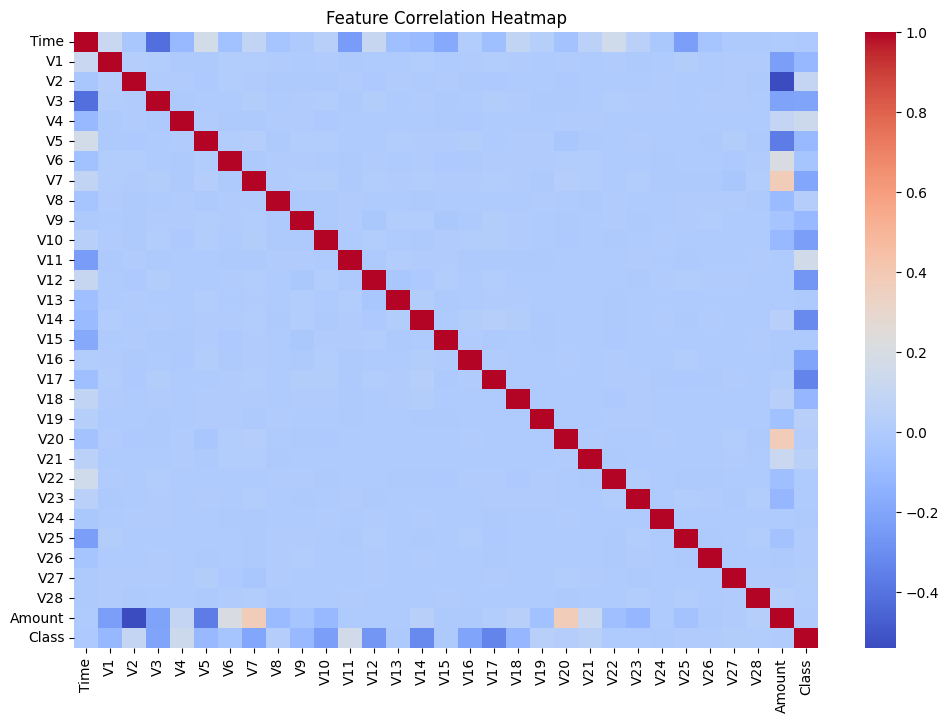

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(credit_card_data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()